# Chapter 3: Continuous random variables

```{epigraph}
*"Do the difficult things while they are easy and do the great things while they are small. A journey of a thousand miles must begin with a single step."*

-- Lao Tzu
```

```{seealso}
- [Continuous probability distribution](https://en.wikipedia.org/wiki/Probability_distribution#Absolutely_continuous_probability_distribution)
```

````{prf:definition} cumulative probability function
:nonumber:
:label: cdf
The cumulative distribution function (CDF) of a real-valued random variable $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$

$$F(x)=P(X \leq x)$$
````
- $0\le F(x)\le 1$
- If $x\le y$, then $F(x)\le F(y)$. The CDF is a monotone increasing function  
- $\lim_{x\rightarrow -\infty} F(x) = P(X<-\infty) = 0$
- $\lim_{x\rightarrow \infty} F(x) = P(X<\infty) = 1$

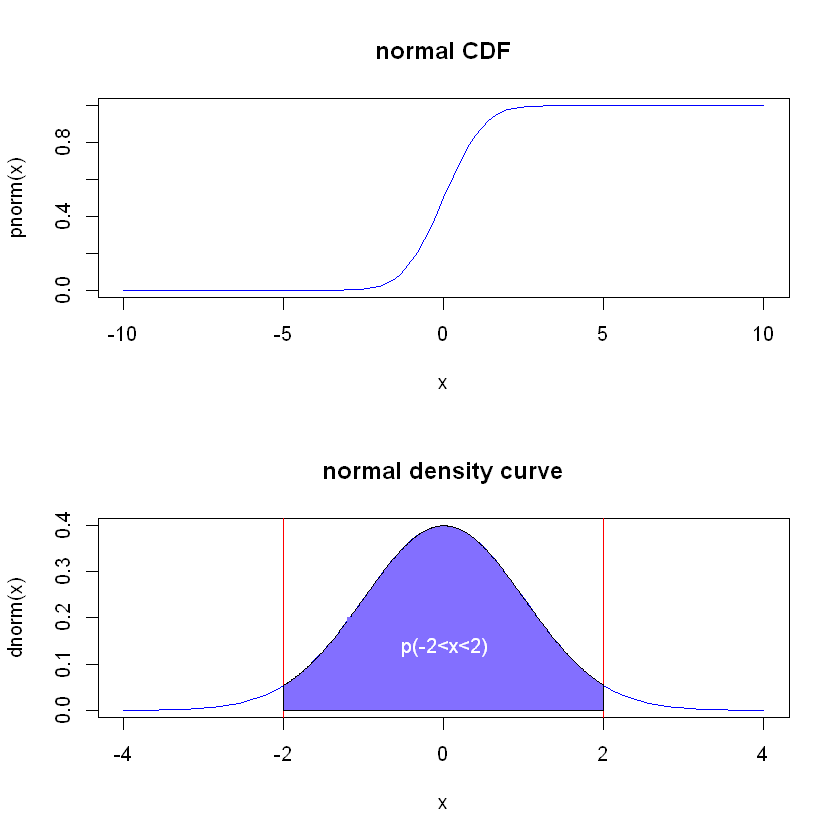

In [1]:
par(mfrow=c(2,1))
# plot normal CDF
curve(pnorm, from = -10, to = 10,col="blue", main="normal CDF")
# plot normal density
curve(dnorm, from=-4, to=4, col="blue", main="normal density curve")
abline(v=c(-2,2),col="red")

# shade the area under the curve
x = seq(-4,4,by=0.01)
y = dnorm(x)
den <- data.frame(x,y)

value1=-2
value2=2
polygon(c(value1,den$x[den$x >= value1 & den$x <= value2],value2),
        c(0, den$y[den$x >= value1 & den$x <= value2 ],0),
        col = "slateblue1", border = 1)
legend(-1.2,0.2,"p(-2<x<2)", text.col="white", border="slateblue1",fill="slateblue1", bg="slateblue1", box.col="slateblue1")

````{prf:definition} probability density function
:nonumber:
:label: pdf
The probability density function $f(x)$ is the derivate of the CDF at $x$, i.e.,

$$f(x)=\frac{d F(x)}{d x}$$
````

- $f(x)\ge 0$
- $F(x)=\int_{-\infty}^{x} f(y) d y$
- $\int_{-\infty}^\infty f(x)dx = 1$
- The probability $P(a<X<b)$ is the area under the density curve $f(x)$ between $a$ and $b$, 

$$P(a<X<b) = \int_a^b f(x)dx$$



````{prf:definition} expectation
:nonumber:
:label: expectation2
Let $f(x)$ be the density function of a random variable $X$. The expectation of $X$ is defined as

$$E(X)=\int_{-\infty}^{\infty} x f(x) d x$$

The expectation $E(X)$ is also called the population mean. 
````

Moreover, the expectation of the function $g(X)$ is defined as

$$E(g(X))=\int_{-\infty}^{\infty} g(x) f(x) d x$$

The variance of $X$ is defined as 

$$var(X) = E(X-E(X))^2$$

- $E(aX+b) = aE(X)+b$
- $var(aX+b) = a^2var(x)$

## Continuous probability distributions

### Uniform distribution


- $f(x)=\frac{1}{b-a}$, for $x \in[a, b]$
- $F(x)=P(X \leq x)=\int_{a}^{x} \frac{1}{(b-a)} d y$
- $E(X)=\int_{a}^{b} x f(x) d x=\frac{a+b}{2}$
- $var(X)=E\left(X^{2}\right)-\{E(X)\}^{2}$

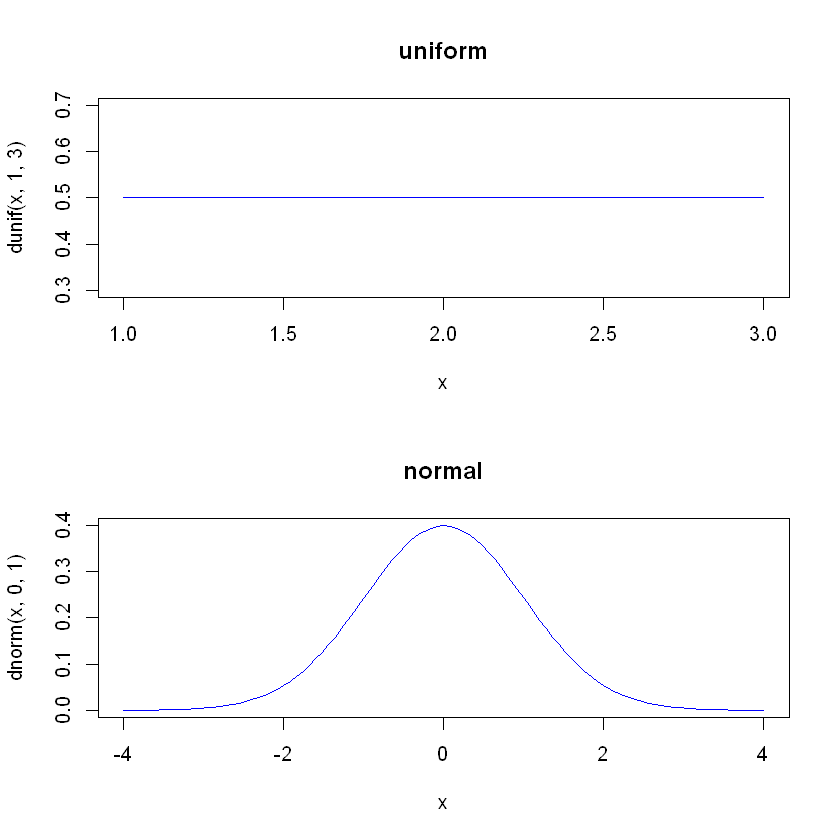

In [2]:
par(mfrow=c(2,1))
curve(dunif(x,1,3), from=1, to=3, main="uniform", col="blue")
curve(dnorm(x,0,1), -4, 4, main="normal", col="blue")

### Normal distribution

- $f(x)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{(x-u)^{2}}{2 \sigma^{2}}}$, for $x \in[-\infty, \infty]$
- $E(X)=u$ and $var(X)=\sigma^{2}$

If random variable $X$ has the normal distribution with mean $u$ and variance $\sigma^{2}, Y=aX+b$ follows the normal distribution with mean $a u+b$ and variance $a^{2} \sigma^{2}$. To calculate the probability, we first standardize the random variable and then use the standard normal distribution to calculate probabilities,

 $$P(X<d)=P\left(\frac{X-u}{\sigma}<\frac{d-u}{\sigma}\right) = P\left(Z<\frac{d-u}{\sigma}\right)$$

### Exponential distribution

- $f(x)=\frac{1}{\lambda} e^{-\frac{x}{\lambda}}$, for $x>0$ and $\lambda>0 . F(x)=1-e^{-\frac{x}{\lambda}}$
- $E(X)=\lambda$ 
- $var(X)=\lambda^{2}$

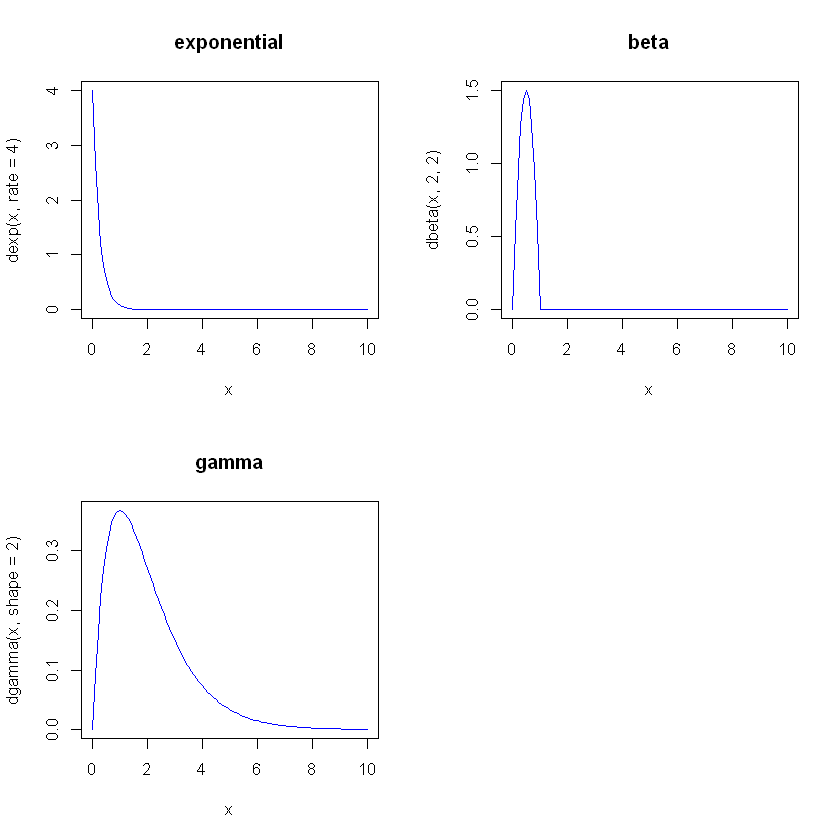

In [3]:
par(mfrow=c(2,2))
curve(dexp(x,rate=4), 0, 10, main="exponential",col="blue")
curve(dbeta(x,2,2),0,10, main="beta",col="blue")
curve(dgamma(x,shape=2), 0, 10, main="gamma",col="blue")

### Beta distribution

- $f(x)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1}(1-x)^{\beta-1}, 0 \leq x \leq 1, \alpha>0, \beta>0$
- $E(X)=\frac{\alpha}{\alpha+\beta}$
- $var(X)=\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}$

### Gamma distribution

- $f(x)=\frac{1}{\Gamma(\alpha) \beta^{\alpha}} x^{\alpha-1} e^{-\frac{x}{\beta}}, x>0, \alpha>0, \beta>0$
- $E(X)=\alpha \beta$
- $var(X)=\alpha \beta^{2}$ 

## Transformation

Three techniques:

(1) CDF: Suppose $Y=g(X)$ and we want to find the probability distribution of Y.

$$
P(Y \leq a)=P(g(X) \leq a)=\int_{g(x) \leq a} f(x) d x
$$

(2) PDF: Suppose that the inverse function $g^{-1}(X)$ exists and is an increasing function.

$$
P(Y \leq a)=P(g(X) \leq a)=P\left(X \leq g^{-1}(a)\right)=F_{X}\left(g^{-1}(a)\right)
$$

Thus, the density function of $Y$ is given by

$$
f_{Y}(a)=F^{\prime}{ }_{X}\left(g^{-1}(a)\right)=f_{x}\left(g^{-1}(a)\right) * \frac{d g^{-1}(a)}{d a}
$$

If $g^{-1}(X)$ is a decreasing function, then

$$
P(Y \leq a)=P(g(X) \leq a)=P\left(X > g^{-1}(a)\right)=1-F_{X}\left(g^{-1}(a)\right)
$$

and 

$$
f_{Y}(a)=-F^{\prime}{ }_{X}\left(g^{-1}(a)\right)=-f_{X}\left(g^{-1}(a)\right) * \frac{d g^{-1}(a)}{d a}
$$

Combining two (increasing or decreasing), we have

$$
f_{Y}(y)=f_{X}\left(g^{-1}(y)\right) *\left|\frac{d g^{-1}(y)}{d y}\right|
$$

````\{prf:example\} 3.1
:nonumber:
:label: 3.1
:nonumber:
The random variable $X$ is an exponential random variable with density function $f(x)=\lambda e^{-\lambda x}$. Find the distribution of $Y=X+2$. The inverse function is $X=Y-2$. Thus, for $y>2$

$$
f_{y}(y)=\lambda e^{-\lambda(y-2)}\left|\frac{d(y-2)}{d y}\right|=\lambda e^{-\lambda(y-2)}
$$
````

(3) MGF: If two random variables $X$ and $Y$ are independent, we can show that

$$
M_{X+Y}(t)=M_{X}(t) M_{Y}(t)
$$

````\{prf:example\} 3.2
:nonumber:
:label: 3.2
:nonumber:
The MGF of a normal random variable is $e^{u t+\sigma^{2} t^{2} / 2}$. Suppose $X_{1}, X_{2}, \ldots, X_{n}$ $\sim Normal\left(u, \sigma^{2}\right)$. Find the probability distribution of the sample average $\frac{\sum_{i=1}^{n} X_{i}}{n}$. 

We first find the MGF of the sum $\sum_{i=1}^{n} X_{i}$, which is equal to

$$
\prod_{i=1}^{n} M(t)=e^{n u t+n \sigma^{2} t^{2} / 2}
$$

The sum $\sum_{i=1}^{n} X_{i}$ has a normal distribution with mean $n \mu$ and variance $n \sigma^{2}$. 

Let $Y=\sum_{i=1}^{n} X_{i}$ and $Z=\frac{Y}{n}$. Then, 

$$E\left(e^{t Z}\right)=E\left(e^{\frac{t Y}{n}}\right)=e^{u t+\frac{\sigma^{2} t^{2}}{2 n}}$$
 
Thus, the sample average $\frac{1}{n}\sum_{i=1}^{n} X_{i}$ has a normal distribution with mean $\mu$ and variance $\frac{\sigma^{2}}{n}$.
````